Setup and Database Connection

In [14]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load environment variables from .env file
load_dotenv()

# Database connection details
DB_USER = os.getenv("POSTGRES_USER")
DB_PASSWORD = os.getenv("POSTGRES_PASSWORD")
DB_HOST = os.getenv("POSTGRES_HOST")
DB_PORT = os.getenv("POSTGRES_PORT")
DB_NAME = os.getenv("POSTGRES_DB")

# Create database engine
try:
    engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")
    print("Successfully connected to the database.")
except Exception as e:
    print(f"Failed to connect to the database. Error: {e}")

python-dotenv could not parse statement starting at line 8


Successfully connected to the database.


Load Data from Silver Layer

In [8]:
try:
    customers_df = pd.read_sql('SELECT * FROM silver."Customers"', engine)
    orders_df = pd.read_sql('SELECT * FROM silver."Orders"', engine)
    shipments_df = pd.read_sql('SELECT * FROM silver."Shipments"', engine)
    drivers_df = pd.read_sql('SELECT * FROM silver."Drivers"', engine)
    vehicles_df = pd.read_sql('SELECT * FROM silver."Vehicles"', engine)

    print("All silver tables loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

✅ All silver tables loaded successfully.


Initial Data Inspection

In [9]:
print("--- Customers Table ---")
print(customers_df.info())
print("\n--- First 5 Rows of Customers ---")
display(customers_df.head())

print("\n\n--- Shipments Table ---")
print(shipments_df.info())
print("\n--- First 5 Rows of Shipments ---")
display(shipments_df.head())

--- Customers Table ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18982 entries, 0 to 18981
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       18982 non-null  int64 
 1   customer_name     18982 non-null  object
 2   email             18982 non-null  object
 3   delivery_address  17033 non-null  object
 4   signup_date       18982 non-null  object
dtypes: int64(1), object(4)
memory usage: 741.6+ KB
None

--- First 5 Rows of Customers ---


,customer_id,customer_name,email,delivery_address,signup_date
0,1,Dev Jain,dev.jain1@example.com,"12 Layout, Chennai",2024-05-25
1,10,Saanvi Singh,saanvi.singh10@test.co.in,"94 Main St, Chennai",2024-08-21
2,100,Anika Shah,anika.shah100@example.com,"18 Nagar, Chennai",2025-05-04
3,1000,Reyansh Mehta,duplicate.user@example.com,"73 Nagar, Chennai",2024-08-24
4,10000,Vivaan Gupta,duplicate.user@example.com,"52 Layout, Chennai",2024-10-02




--- Shipments Table ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14320 entries, 0 to 14319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   shipment_id    14320 non-null  int64         
 1   order_id       14320 non-null  int64         
 2   driver_id      14320 non-null  int64         
 3   vehicle_id     14320 non-null  int64         
 4   dispatch_date  14320 non-null  datetime64[ns]
 5   delivery_date  14320 non-null  datetime64[ns]
 6   status         14320 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 783.2+ KB
None

--- First 5 Rows of Shipments ---


,shipment_id,order_id,driver_id,vehicle_id,dispatch_date,delivery_date,status
0,1,1,297,41,2024-07-19 03:41:49,2024-07-19 09:31:47,Delivered
1,10,10,109,160,2024-08-14 23:46:38,2024-08-17 16:06:08,Failed
2,10000,10000,76,111,2024-10-12 21:26:23,2024-10-14 18:27:38,Delivered
3,10001,10001,57,141,2024-09-09 13:51:27,2024-09-11 11:42:44,In Transit
4,10002,10002,169,26,2024-12-08 06:56:50,2024-12-11 10:33:16,Failed


Descriptive Statistics

In [10]:
# First, let's calculate delivery_hours for the shipments table
shipments_df['delivery_hours'] = (pd.to_datetime(shipments_df['delivery_date']) - pd.to_datetime(shipments_df['dispatch_date'])).dt.total_seconds() / 3600

print("--- Statistical Summary of Orders ---")
display(orders_df.describe())

print("\n\n--- Statistical Summary of Shipments ---")
display(shipments_df.describe())

--- Statistical Summary of Orders ---


,order_id,customer_id,order_total
count,16715.000000,16715.000000,16715.000000
mean,10125.554472,7577.157344,3004.614360
std,5774.095352,5240.349544,1441.986606
min,1.000000,1.000000,500.340000
25%,5106.500000,3356.000000,1760.270000
50%,10230.000000,6765.000000,3007.610000
75%,15134.500000,10198.500000,4248.980000
max,20000.000000,20000.000000,5500.000000




--- Statistical Summary of Shipments ---


,shipment_id,order_id,driver_id,vehicle_id,dispatch_date,delivery_date,delivery_hours
count,14320.000000,14320.000000,14320.000000,14320.000000,14320,14320,14320.000000
mean,10136.357612,10136.357612,248.671788,125.445182,2024-10-29 00:02:26.314595072,2024-10-31 12:32:28.275768064,60.500545
min,1.000000,1.000000,1.000000,1.000000,2024-01-01 07:54:01,2024-01-01 17:59:26,0.003056
25%,5147.500000,5147.500000,124.000000,63.000000,2024-06-02 00:47:24.500000,2024-06-04 19:07:43,30.648542
50%,10232.500000,10232.500000,247.000000,126.000000,2024-10-28 07:02:12,2024-10-30 11:31:52,60.626528
75%,15114.250000,15114.250000,373.000000,188.000000,2025-03-26 13:32:04.249999872,2025-03-29 05:49:42.500000,90.491458
max,20000.000000,20000.000000,500.000000,250.000000,2025-08-26 12:48:20,2025-08-30 17:07:58,119.997778
std,5765.562525,5765.562525,143.895704,72.436495,NaN,NaN,34.531042


Distribution of Shipment Status

/tmp/ipykernel_97089/3636772090.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=shipments_df, x='status', palette='mako', order=shipments_df['status'].value_counts().index)


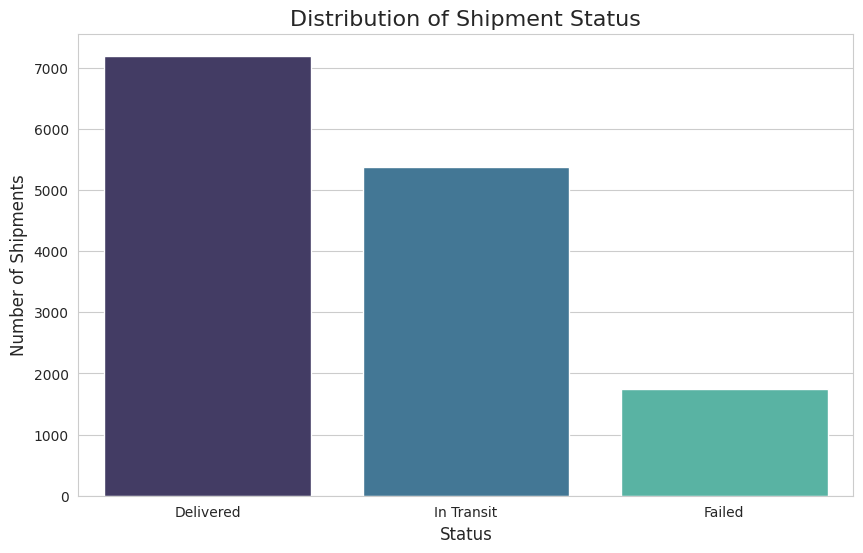

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=shipments_df, x='status', palette='mako', order=shipments_df['status'].value_counts().index)
plt.title('Distribution of Shipment Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.show()

Delivery Time by Vehicle Type 

/tmp/ipykernel_97089/689748429.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=shipments_vehicles_df, x='vehicle_type', y='delivery_hours', palette='coolwarm')


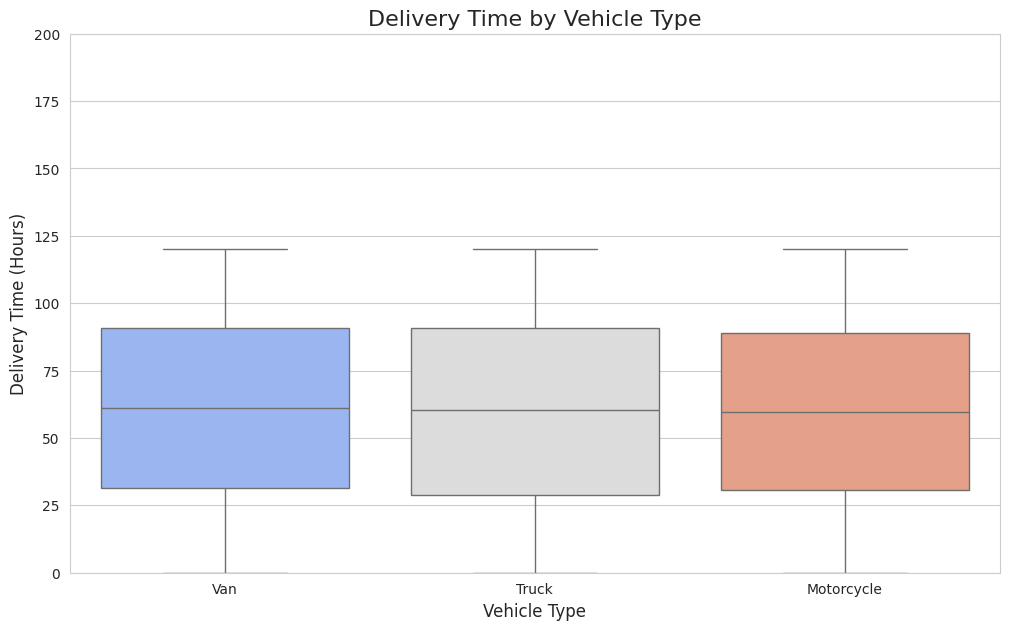

In [13]:
# Merge shipments with vehicles to get the vehicle_type
shipments_vehicles_df = pd.merge(shipments_df, vehicles_df, on='vehicle_id')

plt.figure(figsize=(12, 7))
sns.boxplot(data=shipments_vehicles_df, x='vehicle_type', y='delivery_hours', palette='coolwarm')
plt.title('Delivery Time by Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Delivery Time (Hours)', fontsize=12)
plt.ylim(0, 200) # Zoom in to see the boxes more clearly
plt.show()

Orders by Day of the Week

/tmp/ipykernel_97089/826525616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='day_name', order=day_names, palette='cubehelix')


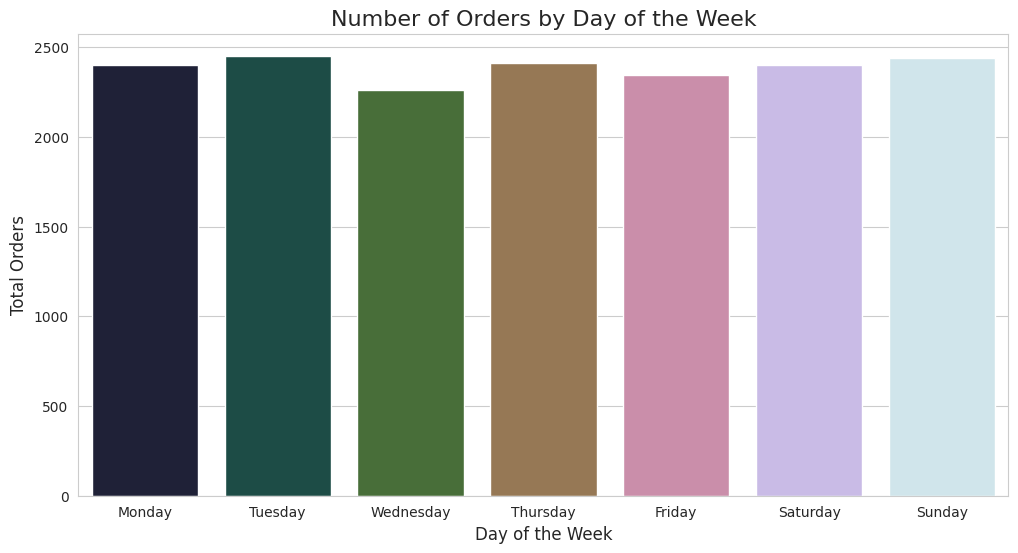

In [18]:
# Extract the day of the week from the order_date (Monday=0, Sunday=6)
orders_df['day_of_week'] = pd.to_datetime(orders_df['order_date']).dt.dayofweek
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_df['day_name'] = orders_df['day_of_week'].apply(lambda x: day_names[x])

plt.figure(figsize=(12, 6))
sns.countplot(data=orders_df, x='day_name', order=day_names, palette='cubehelix')
plt.title('Number of Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.show()